In [1]:
import json
with open('sentiment_label.json') as f:
   data2 = json.load(f)
# data2
sent = list(data2['sentiment_id'])

In [2]:
import pandas as pd
df_ = pd.read_csv('sklearn_emails_labeled.csv',encoding = 'UTF-16', sep='\t')
df_.index.names = ['id']
df_.head()

,id,Date,Subject,Body,merged,clean_text,label
id,,,,,,,
0,0,9/5/2017 5:51,(中日)使用者發出的信件取回問題-接續問題,Dear 網擎：\r\n 附件所示 郵件使用者 alex.chen@cr...,示間 寄出 寄備 份 找 取回 特種 紙廠 股份 限發出 取回 接續,示間 寄出 寄備 找 取回 特種 紙廠 股份 限 發出 取回 接續,"['資料', '方式', '寄出', '引述', '需求', '增域', '增簿', '紀錄..."
1,1,﻿02/27/2018 05:28:12,(仍然無法註冊) Re: M2k - danno149131 - 註冊帳號顯示錯誤,"您好，使用者反應重新註冊帳號，將訂單送出時，系統會顯示""認證失敗，請重新確認您所輸入的帳號密...",反應 重 註 冊 帳 號 訂 單 送 出 系 統 顯 示 認 證 失 敗 重 確 認 輸 入...,重 送 出 系 示 重 入 密 密 重 透 重 取消 訂單 確定 遇 相 情形 詢敬 享 減...,"['登入', '資訊', '帳號', '校園', '備份', '系統', '資料', '回覆..."
2,2,﻿04/18/2018 02:55:09,(希望今天能收到回覆) P-Marker 業務問題 - 潛在客戶：國民健康署,您好，國民健康署張淇鈞 小姐02-2522 0889rubychang@hpa.gov.tw...,健康 署 張淇鈞 需資盤 詢功 價格 張希天 收回 覆麻 煩 繫 愛 洽 詢 敬 享 減 肥...,健康 需資盤 詢功 價格 收回 覆麻 敬 享 肥 享 示 存 送 享 空 接 著 具 情 真...,"['檔案', '資盤', '掃描', '完成', '顯示', '執行', '結果', '報表..."
3,3,﻿05/05/2016 08:45:46,(很急) Fw: (急) MailGates 軟體 - 嘉聯益科技 - 稽核條件沒有正常執行,您好，客戶來電表示還沒收到回覆，今天上午也有寄信到m2k_noc，麻煩您幫忙盡快連繫，謝謝。...,表示 收回 覆天午 寄麻煩 快 繫 愛 洽 詢 享 減 肥 檔 旁 享 圖 示 檔 存 贈 ...,表示 收回 寄 快 享 肥 享 示 存 送 享 空 接 著 具 情 敬 真 端 站 稽核 正...,"['登入', '資訊', '帳號', '校園', '備份', '系統', '資料', '回覆..."
4,4,﻿12/15/2016 01:54:47,(很急) Fw: Mail2000 軟體 - 德律科技 - 管理者帳號疑似被入侵,您好，德律陳先生0933 818 259問題：客戶提到管理者帳號被登入，想確認系統設定是否有...,德律陳理 帳號 登入確 認系統 設定 否動 麻煩 快 繫 愛 洽 詢 享 減 肥 檔 旁 享...,理 帳號 登入 確 認系 統 設定 否動 快 享 肥 享 示 存 送 享 空 接 著 具 情...,"['登入', '資訊', '帳號', '校園', '備份', '系統', '資料', '回覆..."


In [3]:
from sklearn.preprocessing import LabelEncoder

df_[['label']] = df_[['label']].apply(LabelEncoder().fit_transform)

In [4]:
print(df_['label'].value_counts())
topic = list(df_['label'])
# topic

1    1359
3     654
0     363
2     149
Name: label, dtype: int64


In [5]:
topic1_pos = 0
topic2_pos = 0
topic3_pos = 0
topic4_pos = 0
topic1_neg = 0
topic2_neg = 0
topic3_neg = 0
topic4_neg = 0
# 1-0
# 3-1
# 0-2
# 2-3

for i in range(len(sent)):
    if sent[i] == 1:
        if topic[i] == 1:
            topic1_pos += 1
        elif topic[i] == 3:
            topic2_pos += 1
        elif topic[i] == 0:
            topic3_pos += 1
        else:
            topic4_pos += 1
    else:
        if topic[i] == 1:
            topic1_neg += 1
        elif topic[i] == 3:
            topic2_neg += 1
        elif topic[i] == 0:
            topic3_neg += 1
        else:
            topic4_neg += 1

print('pos topic: ', topic1_pos, topic2_pos, topic3_pos, topic4_pos)
print('neg topic: ', topic1_neg, topic2_neg, topic3_neg, topic4_neg)

pos topic:  1184 569 246 130
neg topic:  175 85 117 19


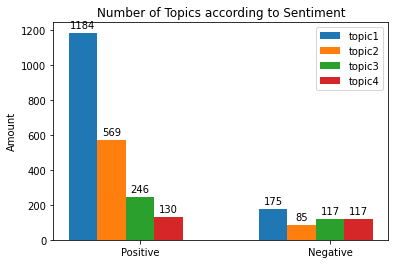

In [6]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']

data1 = [topic1_pos, topic1_neg]
data2 = [topic2_pos, topic2_neg]
data3 = [topic3_pos, topic3_neg]
data4 = [topic4_pos, topic3_neg]

x = np.arange(len(labels))
width = 0.15
fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, data1, width, label='topic1')
rects2 = ax.bar(x - width, data2, width, label='topic2')
rects3 = ax.bar(x , data3, width, label='topic3')
rects4 = ax.bar(x + width, data4, width, label='topic4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount')
ax.set_title('Number of Topics according to Sentiment')
ax.set_xticks(x, ['Positive', 'Negative'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
# fig.tight_layout()

plt.show()